<a href="https://colab.research.google.com/github/Ayat166/ArabicHandWrittenClassification/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv')


In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (13439, 1024)
Y_train: (13439, 1)
X_test:  (3359, 1024)
Y_test:  (3359, 1)


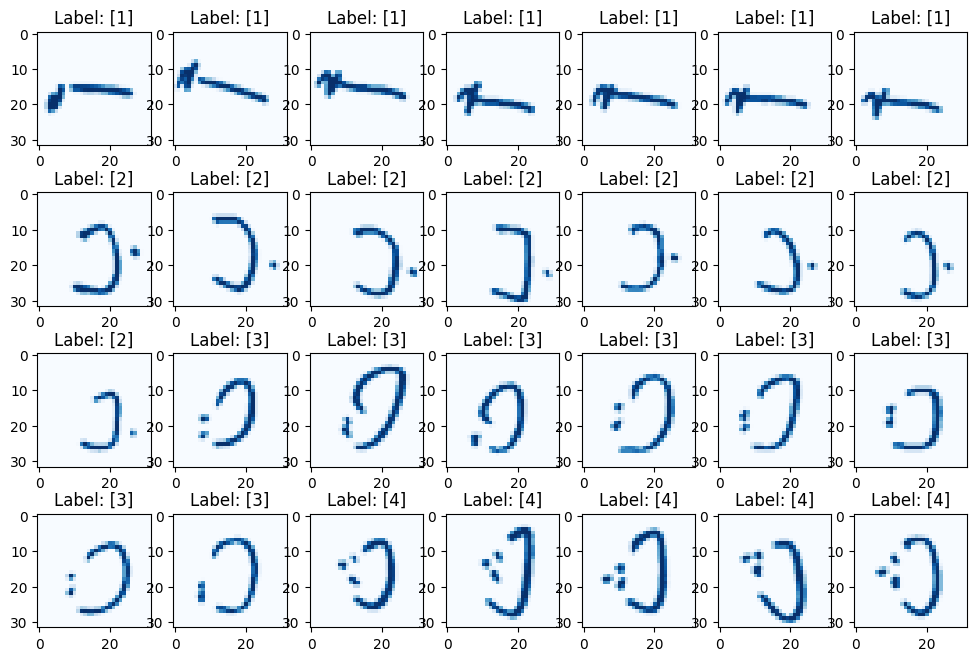

In [ ]:
fig, axes = plt.subplots(4, 7, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
        ax.imshow(X_train.iloc[i].to_numpy().reshape(32,32), cmap='Blues')
        ax.set_title(f"Label: {y_train.iloc[i].to_numpy()}")

plt.show()

In [ ]:
X_train['y']=y_train
X_test['y']=y_test

y = (y_train == 1) | (y_train == 2) | (y_train == 3)| (y_train == 4)
x = (X_train['y']==1) | (X_train['y']==2) | (X_train['y']==3) | (X_train['y']==4)

y2 = (y_test == 1) | (y_test == 2) | (y_test == 3)| (y_test == 4)
x2 = (X_test['y']==1) | (X_test['y']==2) | (X_test['y']==3) | (X_test['y']==4)


X_subset = X_train[x]
y_subset = y_train[y]

X_subset_test = X_test[x2]
y_subset_test = y_test[y2]

y_subset.dropna(inplace=True)
X_subset.drop('y', axis='columns', inplace=True)
y_subset_test.dropna(inplace=True)
X_subset_test.drop('y', axis='columns', inplace=True)

X_subset.columns = [''] * len(X_subset.columns)
X_subset_test.columns = [''] * len(X_subset_test.columns)

<ipython-input-75-a17dcce6c56f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset.drop('y', axis='columns', inplace=True)
<ipython-input-75-a17dcce6c56f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset_test.drop('y', axis='columns', inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
scaler.fit(X_subset)

X_subset = scaler.transform(X_subset)
X_subset_test = scaler.transform(X_subset_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_subset, y_subset)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_predict = classifier.predict(X_subset_test)
print(accuracy_score(y_subset_test, y_predict))

0.651356993736952


In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_subset, y_subset)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_subset_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_subset_test, predictive_labels))

0.5323590814196242


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
